In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
X,y = make_blobs(n_samples=100,n_features=2,centers=4,cluster_std=1.5,random_state=4)
# This code creates a dataset with 100 samples divided into 4 classes and the number of features is 2. Number of samples, features and classes can easily be adjusted using related parameters. We can also adjust how much each cluster (or class) is spread. Let’s visualize this synthetic data set:

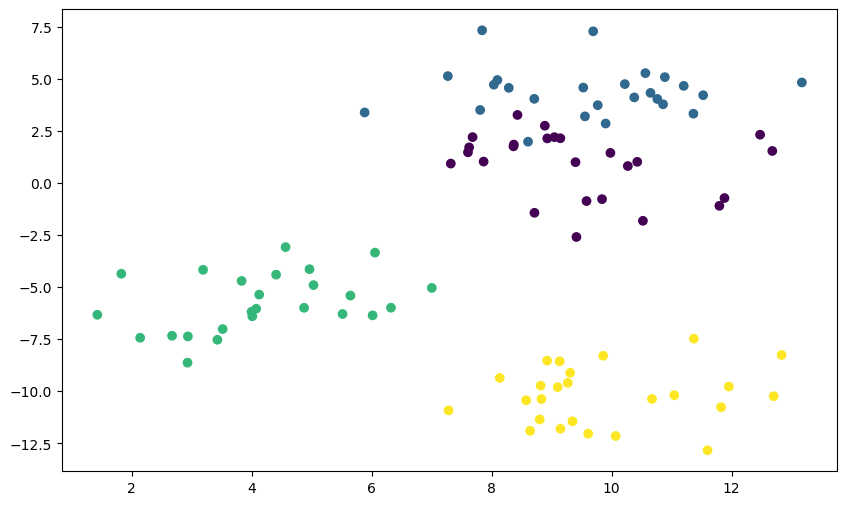

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,marker='o')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [5]:
knn5 = KNeighborsClassifier() # k = 5 by default
knn1 = KNeighborsClassifier(n_neighbors=1) # k=1

In [6]:
knn5.fit(X,y)
knn1.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
y_pred5 = knn5.predict(X_test)
y_pred1 = knn1.predict(X_test)

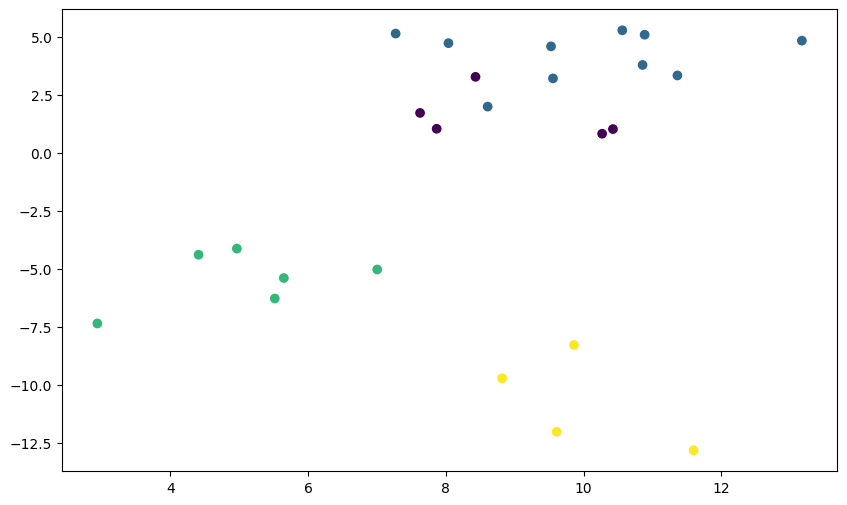

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred1,marker='o')
plt.show()

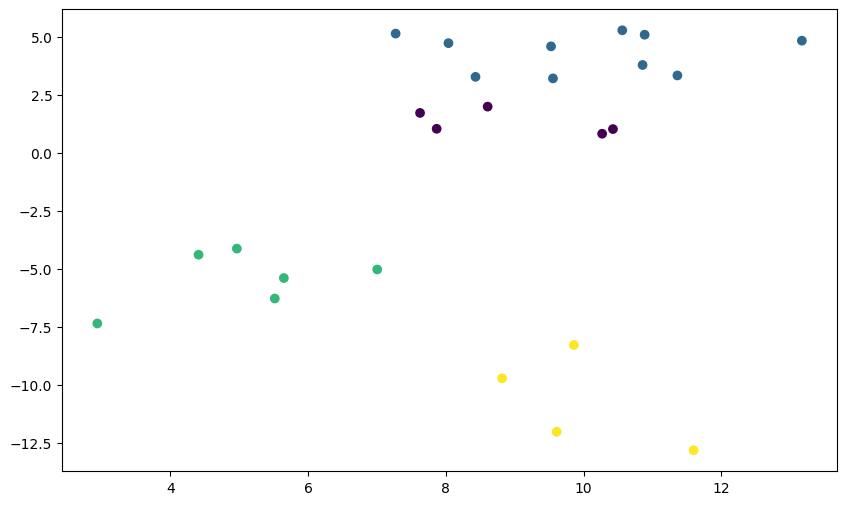

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred5,marker='o')
plt.show()

In [ ]:
# here both 5 and 1 have performed almost identical , this is because the dataset was small

# gridSearchCV can be used to find the best value of k

## Real Example

In [11]:
df = pd.read_csv("social.csv")

X = df.drop(columns=["Purchased"])
y = df.Purchased

In [15]:
le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
classifier = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski, the equation for it is given below

<img src="https://editor.analyticsvidhya.com/uploads/961341_boqym__Ai1n-WxaR1X6Dhw.png" alt="Analytics Vidhya Image" width="500">


As per the equation, we have to select the p-value also.
p = 1 , Manhattan Distance
p = 2 , Euclidean Distance
p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also u can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set





In [23]:
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(f"The Accuracy of our model is {ac}")

The Accuracy of our model is 0.95


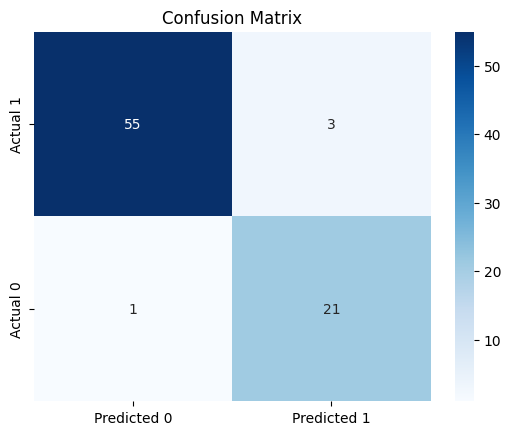

In [33]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["Predicted 0","Predicted 1"],yticklabels=["Actual 1", "Actual 0"])
plt.title("Confusion Matrix")

plt.show()